# Atmospheric Data Analysis Suite

In [286]:
# IMPORTS
import pandas as pd
%matplotlib inline
from IPython.display import display
from ipywidgets import widgets
from IPython.html.widgets import *
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import *
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns
sns.set_context("poster")
import numpy as np
import pprint as pp
import scipy.stats as stats

In [287]:
# HELPER FUNCTIONS
def clean_string(s):
    return s.replace(" ", "")


### SELECT DATAFRAMES

If the csv file with your data is not in this folder, please include the path to the correct folder. 
'/Doucments/data/mydata.csv'


In [338]:
df_dict = {}
df1Filename = widgets.Text(
    description='.CSV File:',
    value= 'Kwadela2013-winter.csv',
)
df1Filename

In [289]:
df2Filename = widgets.Text(
    description='.CSV File:',
    value= 'Kwadela2014-winter.csv',
)
df2Filename

In [290]:
dataframe1 = pd.read_csv(df1Filename.value)
dataframe2 = pd.read_csv(df2Filename.value)

In [291]:
dataframe1_name = widgets.Text(
    description='Dataframe 1 name:',
    value= 'Dataframe1',
)

dataframe1_name

In [292]:
dataframe2_name = widgets.Text(
    description='Dataframe 2 name:',
    value= 'Dataframe2',
)
dataframe2_name

### SELECT FEATURES
Choose the columns from dataframe 1 that you would like to analyze.
Check boxes to the right of the column you wish to select.

In [293]:
default_select = ['Date', 'Hour', 'Minute', 'Second', 'Year', 'Dusttraks_(mg/m3)','PM10_(ug/m3)','PM2.5_(ug/m3)','SO2_(ppb)',
              'CO_(ppm)','NO_(ppb)','NO2_(ppb)','Hour', 'Minute','Day','Month',
              'Year','Temperature_(degC)','Wind_Speed_(m/s)']
kitchen_list = [column for column in dataframe1 if '-K' in column] #KwaDela

In [294]:
cb_cont = widgets.HBox(width='100%')
cb_cont.overflow_x = 'scroll'
checkboxes = []
for column in dataframe1:
    if column in dataframe2:
        if column in default_select:
            checkboxes.append(\
                 widgets.Checkbox(description = clean_string('%s') %(column), \
                             value=True, width=50))
        elif column in kitchen_list: #To be removed: KwaDela specific
            checkboxes.append(\
                 widgets.Checkbox(description = clean_string('%s') %(column), \
                             value=True, width=50))
        else:
            checkboxes.append(\
                 widgets.Checkbox(description = clean_string('%s') %(column), \
                             value=False, width=50))
cb_cont.children=[i for i in checkboxes]
display(cb_cont)




In [295]:
df1_columns = []
for checkbox in cb_cont.children:
    if checkbox.value:
        df1_columns.append(checkbox.description)
        print checkbox.description
dataframe1 = dataframe1[df1_columns]

Date
Wind_Speed_(m/s)
Temperature_(degC)
SO2_(ppb)
NO_(ppb)
NO2_(ppb)
PM10_(ug/m3)
PM2.5_(ug/m3)
CO_(ppm)
H01-K-E
H02-K-N
H03-K-S
H04-K-S
H05-K-N
H06-K-N
H07-K-S
H10-K-N
Dusttraks_(mg/m3)


In [296]:
# AUTOMATICALLY SELECTS BOXES THAT APPEAR IN BOTH DATAFRAMES AND WERE CHOSEN FOR DATAFRAME 1.
checkboxes = []
for column in dataframe2:
    if column in df1_columns:
        checkboxes.append(\
             widgets.Checkbox(description = clean_string('%s') %(column), \
                         value=True, width=50))
    elif column in default_select:
        checkboxes.append(\
             widgets.Checkbox(description = clean_string('%s') %(column), \
                         value=True, width=50))
    else:
        checkboxes.append(\
             widgets.Checkbox(description = clean_string('%s') %(column), \
                         value=False, width=50))
cb_cont.children=[i for i in checkboxes]
display(cb_cont)



In [297]:
df2_columns = []
for checkbox in cb_cont.children:
    if checkbox.value:
        df2_columns.append(checkbox.description)
        print checkbox.description
        
dataframe2 = dataframe2[df2_columns]

Date
Hour
Minute
Second
Day
Month
Year
Wind_Speed_(m/s)
Temperature_(degC)
SO2_(ppb)
NO_(ppb)
NO2_(ppb)
PM10_(ug/m3)
PM2.5_(ug/m3)
CO_(ppm)
H01-K-E
H02-K-N
H03-K-S
H04-K-S
H05-K-N
H06-K-N
H07-K-S
H10-K-N
Dusttraks_(mg/m3)


In [331]:
house_list = [column for column in dataframe1 if '-K' in column]
home1 = widgets.Dropdown(
    options= house_list,
    description='Choose a home from ' + dataframe1_name.value,
)
display(home1)

In [299]:
house_list = [column for column in dataframe2 if '-K' in column]
home2 = widgets.Dropdown(
    options= house_list,
    description='Choose a home from ' + dataframe2_name.value,
)
display(home2)

In [300]:
print(home1.value)
print(home2.value)

H01-K-E
H01-K-E


### DATAFRAME 1

In [301]:
dataframe1.head()

,Date,Wind_Speed_(m/s),Temperature_(degC),SO2_(ppb),NO_(ppb),NO2_(ppb),PM10_(ug/m3),PM2.5_(ug/m3),CO_(ppm),H01-K-E,H02-K-N,H03-K-S,H04-K-S,H05-K-N,H06-K-N,H07-K-S,H10-K-N,Dusttraks_(mg/m3)
0,7/2/13 12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7/2/13 12:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7/2/13 12:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7/2/13 12:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7/2/13 12:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### DATAFRAME 2

In [302]:
dataframe2.head()

,Date,Hour,Minute,Second,Day,Month,Year,Wind_Speed_(m/s),Temperature_(degC),SO2_(ppb),...,CO_(ppm),H01-K-E,H02-K-N,H03-K-S,H04-K-S,H05-K-N,H06-K-N,H07-K-S,H10-K-N,Dusttraks_(mg/m3)
0,7/11/14 12:00,12,0,0,11,7,2014,4.458,11.910,NaN,...,0.193,22.3,15.4,13.1,13.8,15.4,11.7,15.3,17.1,0.043
1,7/11/14 12:01,12,1,0,11,7,2014,4.887,11.944,NaN,...,0.163,22.9,15.3,13.1,13.8,15.4,11.7,15.4,17.2,0.041
2,7/11/14 12:02,12,2,0,11,7,2014,2.988,11.860,NaN,...,0.188,23.5,15.3,13.0,13.8,15.5,11.8,15.4,17.3,0.042
3,7/11/14 12:03,12,3,0,11,7,2014,5.413,12.028,NaN,...,0.206,24.1,15.2,13.1,13.7,15.5,11.8,15.5,17.4,0.044
4,7/11/14 12:04,12,4,0,11,7,2014,6.788,12.310,NaN,...,0.240,24.7,15.2,13.1,13.7,15.5,11.8,15.5,17.5,0.043


### SOME HELPER FUNCTIONS TO BE USED IN ANALYSIS

In [303]:
def get_datetime(s):
    """strips date and time from the already existing date column"""
    dt = datetime.strptime(s, "%m/%d/%y %H:%M")
    return dt

def daysSinceStart(df):
    """get time since epoch using a series for month and day
    takes in dataframe and returns the dataframe with an added column
    for days since the beginning of data collection"""
    
    dayArray = np.array(df.Day)
    monthArray = np.array(df.Month)
    
    runningDays = []
    for day, month in zip(dayArray, monthArray):
        if month == 7:
            total_days = 0
            #do nothing, append the normal day
        elif month == 8:
            total_days = 31 
        elif month == 9:
            total_days = 61
        else:
            raise ValueError 
        total_days = total_days + day
        #print'tot days:', total_days, month, day
        runningDays.append(total_days)
    df['DayCount'] = pd.Series(runningDays, index = df.index)
    return df


#Daily Average Temperature

def compute_avg_vals(df):
    """computes average values of each day in a dataframe
    must apply to a groupby object where df is grouped by days
    returns a dataframe with several new, added columns """
    
    df['DailyAverageTemp'] = df['Temperature_(degC)'].mean()
    #df['DailyAverageTempHouse'] = df['AvgHouse'].mean()
    #computes avg indoor temp: takes in a dataframe and returns a dataframe with a new column
    #Removed: df['H07-K-S'].mean() because it's mostly just Nans
    #df['AvgHouse'] = (df['H01-K-E'].mean()+ df['H02-K-N'].mean() + df['H03-K-S'].mean()+ df['H04-K-S'].mean())/4
    #df['DailyAvgHouse']= df['AvgHouse'].mean()
    #Dusttraks/PM4
    df['DailyAvgDusttraks'] = df['Dusttraks_(mg/m3)'].mean()
    df['DailyAvgPM4'] = df['PM4_(ug/m3)'].mean()
    df['DailyAvgWind'] = df['Wind_Speed_(m/s)'].mean()
    return df

def compute_avg_house13(df):
    """tailored to compute the average indoor house temperature of 2013"""
    df['AvgHouse'] = (df['H01-K-E']+ df['H02-K-N']+ df['H03-K-S']+ df['H04-K-S']
                      + df['H05-K-N']+df['H06-K-N'] + df['H10-K-N']
                      +df['H11-K-X']+ df['H12-K-N'] + df['H15-K-S'] +df['H17-K-N'] 
                      + df['H18-K-S'] + df['H20-K-S']
                      )/13
    return df

def compute_avg_house14(df):
    """tailored to compute the avg indoor house temp for 2014"""
    df['AvgHouse'] = (df['H01-K-E']+ df['H02-K-N']+ df['H03-K-S']+ df['H04-K-S']
                      + df['H05-K-N']+df['H06-K-N'] + df['H10-K-N']
                      +df['H11-K-N'] + df['H15-K-N']+df['H16-K-N'] +df['H17-K-S'] 
                      + df['H18-K-N']+df['H19-K-W'] + df['H22-K-S']
                      )/14
    return df

def tempdifference(df):
    """computes a column of the difference in indoor and outdoor temperature, AvgHouse and Temperature_(degC)
    df: any given dataframe
    returns a dataframe with a new column"""
    df['tempdifference'] = df['AvgHouse']-df['Temperature_(degC)']
    return df


def abcdeTimeDataframes(df):
    """splits a dataframe into a series of times for differently characterized burning periods of the day
    df: timeseries dataframe to be split into specified time ranges
    returns: 4 different dataframes for early morning, breakfast, afternoon, dinner, and evening times
    """
    #DATAFRAMES FOR GIVEN TIME RANGES
    dfA = df[df['Hour'] < 5]
    dfB = df[df['Hour'] > 4]
    dfB = dfB[dfB['Hour'] <= 9]
    dfC = df[df['Hour'] >9]
    dfC = dfC[dfC['Hour'] <= 14]
    dfD = df[df['Hour'] >14]
    dfD = dfD[dfD['Hour'] <= 21]
    dfE = df[df['Hour'] > 21]
    res = [dfA, dfB, dfC, dfD, dfE]
    return res


#GENERAL FUNCTION FOR DIURNAL DATA

def getmeanfeatureforhour(hourdf, feature):
    """hourdf: dataframe specific to one hour of data
    feature: given header to be explored (temperature, PMx, etc)
    returns: dataframe with a new mean feature per hour"""
    
    res = hourdf[feature].mean()
    return res

def featurediurnaldata(df, feature):
    """breaks down a given dataframe by feature into one dataframe per hour (24) for plotting of a dirunal profile
    df: dataframe to be broken down
    feature: header to be broken down"""
    #feature for example could be a temperature or pollutant concentration
    dfhour0 = df[df['Hour'] == 0]
    feat0 = getmeanfeatureforhour(dfhour0, feature)
    dfhour1 = df[df['Hour'] == 1]
    feat1= getmeanfeatureforhour(dfhour1, feature)
    dfhour2 = df[df['Hour'] == 2]
    feat2 = getmeanfeatureforhour(dfhour2, feature)
    dfhour3 = df[df['Hour'] == 3]
    feat3 = getmeanfeatureforhour(dfhour3, feature)
    dfhour4 = df[df['Hour'] == 4]
    feat4 = getmeanfeatureforhour(dfhour4, feature)
    dfhour5 = df[df['Hour'] == 5]
    feat5 = getmeanfeatureforhour(dfhour5, feature)
    dfhour6 = df[df['Hour'] == 6]
    feat6 = getmeanfeatureforhour(dfhour6, feature)
    dfhour7 = df[df['Hour'] == 7]
    feat7 = getmeanfeatureforhour(dfhour7, feature)
    dfhour8 = df[df['Hour'] == 8]
    feat8 = getmeanfeatureforhour(dfhour8, feature)
    dfhour9 = df[df['Hour'] == 9]
    feat9 = getmeanfeatureforhour(dfhour9, feature)
    dfhour10 = df[df['Hour'] == 10]
    feat10 = getmeanfeatureforhour(dfhour10, feature)
    dfhour11 = df[df['Hour'] == 11]
    feat11 = getmeanfeatureforhour(dfhour11, feature)
    dfhour12 = df[df['Hour'] == 12]
    feat12 = getmeanfeatureforhour(dfhour12, feature)
    dfhour13 = df[df['Hour'] == 13]
    feat13 = getmeanfeatureforhour(dfhour13, feature)
    dfhour14 = df[df['Hour'] == 14]
    feat14 = getmeanfeatureforhour(dfhour14, feature)
    dfhour15 = df[df['Hour'] == 15]
    feat15 = getmeanfeatureforhour(dfhour15, feature)
    dfhour16 = df[df['Hour'] == 16]
    feat16 = getmeanfeatureforhour(dfhour16, feature)
    dfhour17 = df[df['Hour'] == 17]
    feat17 = getmeanfeatureforhour(dfhour17, feature)
    dfhour18 = df[df['Hour'] == 18]
    feat18 = getmeanfeatureforhour(dfhour18, feature)
    dfhour19 = df[df['Hour'] == 19]
    feat19 = getmeanfeatureforhour(dfhour19, feature)
    dfhour20 = df[df['Hour'] == 20]
    feat20 = getmeanfeatureforhour(dfhour20, feature)
    dfhour21 = df[df['Hour'] == 21]
    feat21 = getmeanfeatureforhour(dfhour21, feature)
    dfhour22 = df[df['Hour'] == 22]
    feat22 = getmeanfeatureforhour(dfhour22, feature)
    dfhour23 = df[df['Hour'] == 23]
    feat23 = getmeanfeatureforhour(dfhour23, feature)

    featlist = [feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23]
    return featlist



def preprocess(df):
    """get all mean features and recodes for plotting and stats analysis
    apply correction factor and unit tweaking where appropriate
    returns: a copy of the original df with added hour, day,month, year, daycount
    tempdifferent, and PM4 counts"""

    res = df.copy()
    if hasattr(res, 'Date'):
        datetimes = res.Date.apply(get_datetime)
        res['Hour'] = datetimes.apply(lambda dt: dt.hour)
        res['Day'] = datetimes.apply(lambda dt: dt.day)
        res['Month'] = datetimes.apply(lambda dt: dt.month)
        res['Year'] = datetimes.apply(lambda dt: dt.year)
    res = daysSinceStart(res)
    res['Dusttraks_(mg/m3)']= res['Dusttraks_(mg/m3)']*0.14
    res['PM4_(ug/m3)']=res['Dusttraks_(mg/m3)']*1000
    grouped = res.groupby('DayCount')
    res = grouped.apply(compute_avg_vals)
    #res= tempdifference(res)
    return res




### SOME DATAFRAME CLEANING

In [339]:
dataframe1 = preprocess(dataframe1)
dataframe2 = preprocess(dataframe2)

df_dict['dataframe1']=dataframe1
df_dict['dataframe2']=dataframe2

## COMPARING TWO DATASETS

CHOOSE VAL

In [309]:
df1_columns = [column for column in dataframe1]
df1_feature_x = widgets.Dropdown(
    options= df1_columns,
    value = 'DayCount',
    description='Choose x feature:'
)
display(df1_feature_x)

In [310]:
df1_columns = [column for column in dataframe1]
df1_feature_y = widgets.Dropdown(
    options= df1_columns,
    description='Choose y feature:'
)
display(df1_feature_y)

AttributeError: 'Series' object has no attribute 'find'

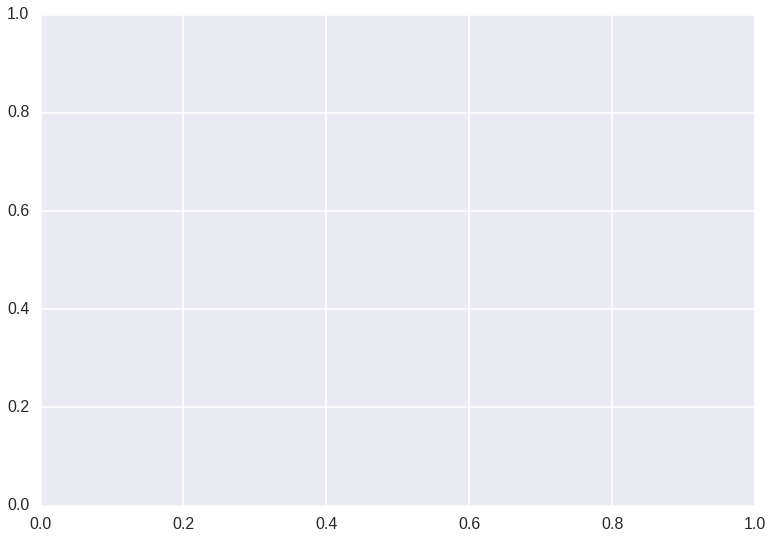

In [311]:
plt.plot(dataframe1[df1_feature_x.value], dataframe1[df1_feature_y.value])
plt.plot(dataframe2[df1_feature_x.value], dataframe2[df1_feature_y.value])
plt.xlabel(df1_feature_x.value + ' (Need units)')
plt.ylabel(df1_feature_y.value + ' (Need units)')
plt.title(dataframe1_name.value + ' vs ' + dataframe2_name.value)
plt.show()

## COMPARE TWO DATASETS DIURNAL

In [ ]:
#GENERAL FUNCTION FOR DIURNAL DATA

def getmeanfeatureforhour(hourdf, feature):
    """hourdf: dataframe specific to one hour of data
    feature: given header to be explored (temperature, PMx, etc)
    returns: dataframe with a new mean feature per hour"""
    
    res = hourdf[feature].mean()
    return res

def featurediurnaldata(df, feature):
    """breaks down a given dataframe by feature into one dataframe per hour (24) for plotting of a dirunal profile
    df: dataframe to be broken down
    feature: header to be broken down"""
    #feature for example could be a temperature or pollutant concentration
    dfhour0 = df[df['Hour'] == 0]
    feat0 = getmeanfeatureforhour(dfhour0, feature)
    dfhour1 = df[df['Hour'] == 1]
    feat1= getmeanfeatureforhour(dfhour1, feature)
    dfhour2 = df[df['Hour'] == 2]
    feat2 = getmeanfeatureforhour(dfhour2, feature)
    dfhour3 = df[df['Hour'] == 3]
    feat3 = getmeanfeatureforhour(dfhour3, feature)
    dfhour4 = df[df['Hour'] == 4]
    feat4 = getmeanfeatureforhour(dfhour4, feature)
    dfhour5 = df[df['Hour'] == 5]
    feat5 = getmeanfeatureforhour(dfhour5, feature)
    dfhour6 = df[df['Hour'] == 6]
    feat6 = getmeanfeatureforhour(dfhour6, feature)
    dfhour7 = df[df['Hour'] == 7]
    feat7 = getmeanfeatureforhour(dfhour7, feature)
    dfhour8 = df[df['Hour'] == 8]
    feat8 = getmeanfeatureforhour(dfhour8, feature)
    dfhour9 = df[df['Hour'] == 9]
    feat9 = getmeanfeatureforhour(dfhour9, feature)
    dfhour10 = df[df['Hour'] == 10]
    feat10 = getmeanfeatureforhour(dfhour10, feature)
    dfhour11 = df[df['Hour'] == 11]
    feat11 = getmeanfeatureforhour(dfhour11, feature)
    dfhour12 = df[df['Hour'] == 12]
    feat12 = getmeanfeatureforhour(dfhour12, feature)
    dfhour13 = df[df['Hour'] == 13]
    feat13 = getmeanfeatureforhour(dfhour13, feature)
    dfhour14 = df[df['Hour'] == 14]
    feat14 = getmeanfeatureforhour(dfhour14, feature)
    dfhour15 = df[df['Hour'] == 15]
    feat15 = getmeanfeatureforhour(dfhour15, feature)
    dfhour16 = df[df['Hour'] == 16]
    feat16 = getmeanfeatureforhour(dfhour16, feature)
    dfhour17 = df[df['Hour'] == 17]
    feat17 = getmeanfeatureforhour(dfhour17, feature)
    dfhour18 = df[df['Hour'] == 18]
    feat18 = getmeanfeatureforhour(dfhour18, feature)
    dfhour19 = df[df['Hour'] == 19]
    feat19 = getmeanfeatureforhour(dfhour19, feature)
    dfhour20 = df[df['Hour'] == 20]
    feat20 = getmeanfeatureforhour(dfhour20, feature)
    dfhour21 = df[df['Hour'] == 21]
    feat21 = getmeanfeatureforhour(dfhour21, feature)
    dfhour22 = df[df['Hour'] == 22]
    feat22 = getmeanfeatureforhour(dfhour22, feature)
    dfhour23 = df[df['Hour'] == 23]
    feat23 = getmeanfeatureforhour(dfhour23, feature)

    featlist = [feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23]
    return featlist

hour_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [ ]:
df1_columns = [column for column in dataframe1]
df_feature_diurnal = widgets.Dropdown(
    options= df1_columns,
    description='Choose feature:'
)
display(df_feature_diurnal)

In [ ]:
def plotDiurnal(hour_list, dataframe1, dataframe2, df_feature_diurnal, dataframe1_name, dataframe2_name):
    while True:
         try:
            plt.plot(hour_list, featurediurnaldata(dataframe1, df_feature_diurnal.value))
            plt.plot(hour_list, featurediurnaldata(dataframe2, df_feature_diurnal.value))
            plt.title('Diurnal profile of ' + df_feature_diurnal.value)
            plt.legend([dataframe1_name.value, dataframe2_name.value])
            plt.ylabel(df_feature_diurnal.value + ' (Needs units)')
            plt.xlabel('Hour of day')
            plt.show()
            break
         except TypeError:
            print "Cannont plot diurnal graph. Please try a different feature"
            return

plotDiurnal(hour_list, dataframe1, dataframe2, df_feature_diurnal, dataframe1_name, dataframe2_name)


## Choose date/time range
Assuming sorted by date.

In [ ]:
start_day = widgets.Text(
    description='Select start of time range m/dd/yy',
    value= '7/11/14',
)
start_day

In [ ]:
start_day = start_day.value

In [ ]:
end_day = widgets.Text(
    description='Select start of time range m/dd/yy',
    value= '8/20/14',
)
end_day

In [ ]:
end_day = end_day.value

In [ ]:
def getDateStartIndex(dataframe1, start_day):
    for date in dataframe1.Date:
        if date[0:6] == start_day:
            print  dataframe1['Date'][dataframe1['Date'][0:6] == start_day]
            return dataframe1['Date'][dataframe1['Date'][0:6] == start_day]

start_date_index = getDateStartIndex(dataframe1, start_day)
print start_date_index
#df = df[dataframe['date'] ]

In [312]:
for date in dataframe1.Date:
        if date[0:6] == start_day:
            df=dataframe1[dataframe1['Date']== start_day]
            daycount= daycount

In [313]:
warm_days_cutoff = warm_days.value

In [314]:
start_day = widgets.Text(
    description='Select start of time range',
    value= '14.4',
)
start_day

In [315]:
warm_days_cutoff = warm_days.value

## Temperature Brackets
Currently assumes Temperature_(degC) column in dataset.

In [316]:
warm_days = widgets.Text(
    description='Minimum average temperature for warm days',
    value= '14.4',
)
warm_days

In [324]:
warm_days_cutoff = float(warm_days.value)

In [318]:
cold_days = widgets.Text(
    description='Minimum average temperature for cold days',
    value= '8.7',
)
cold_days

In [319]:
cold_days_cutoff = float(cold_days.value)

In [340]:
dataframe1.dropna
dataframe1.dropna()
dataframe1=dataframe1[np.isfinite(dataframe1['DailyAverageTemp'])]
df1cold = dataframe1[(dataframe1['DailyAverageTemp']) <= cold_days_cutoff]
df_dict['df1cold']=df1cold
df1mid = dataframe1[dataframe1['DailyAverageTemp'] > cold_days_cutoff]
df1mid = df1mid[df1mid['DailyAverageTemp'] < warm_days_cutoff]
df_dict['df1mid']=df1mid
df1warm = dataframe1[dataframe1['DailyAverageTemp'] >= warm_days_cutoff]
df_dict['df1warm']=df1warm
df2cold = dataframe2[dataframe2['DailyAverageTemp'] <= cold_days_cutoff]
df_dict['df2cold']=df2cold
df2mid = dataframe2[dataframe2['DailyAverageTemp'] > cold_days_cutoff]
df2mid = df2mid[df2mid['DailyAverageTemp'] < warm_days_cutoff]
df_dict['df2mid']=df2mid
df2warm = dataframe2[dataframe2['DailyAverageTemp'] >= warm_days_cutoff]
df_dict['df2warm']=df2warm

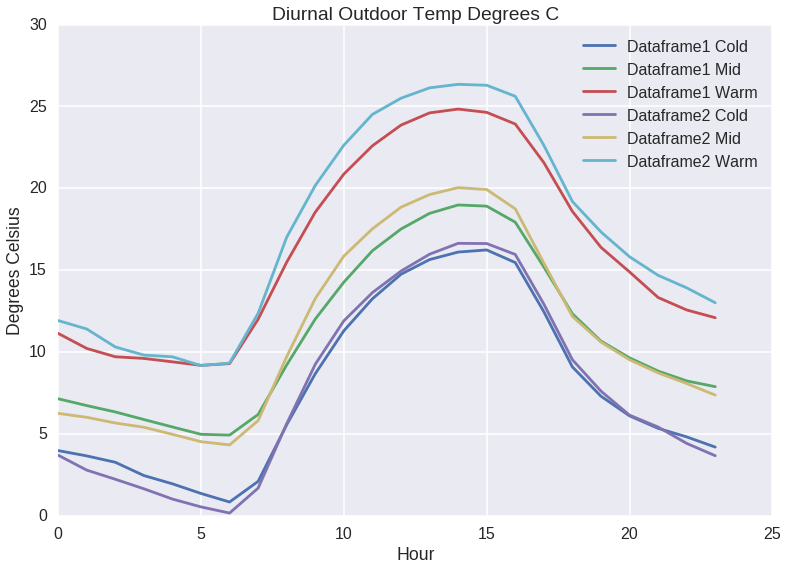

In [325]:
hourlist = range(0,24)
def plotTempBracketDiurnal(hourlist, df1cold, df2cold, df1mid, df2mid, df1warm, df2warm, df1_name, df2_name):
    plt.plot(hourlist, featurediurnaldata(df1cold, 'Temperature_(degC)'))
    plt.plot(hourlist, featurediurnaldata(df1mid, 'Temperature_(degC)'))
    plt.plot(hourlist, featurediurnaldata(df1warm, 'Temperature_(degC)'))
    plt.plot(hourlist, featurediurnaldata(df2cold, 'Temperature_(degC)'))
    plt.plot(hourlist, featurediurnaldata(df2mid, 'Temperature_(degC)'))
    plt.plot(hourlist, featurediurnaldata(df2warm, 'Temperature_(degC)'))         

    plt.legend([df1_name + ' Cold', df1_name + ' Mid', df1_name + ' Warm', df2_name + ' Cold', df2_name + ' Mid', df2_name + ' Warm'])
    plt.title('Diurnal Outdoor Temp Degrees C')
    plt.xlabel('Hour')
    plt.ylabel('Degrees Celsius')
    plt.show()

plotTempBracketDiurnal(hourlist, df1cold, df2cold, df1mid, df2mid, df1warm, df2warm, dataframe1_name.value, dataframe2_name.value)

                 Date  Wind_Speed_(m/s)  Temperature_(degC)  SO2_(ppb)  \
0        7/2/13 12:00               NaN                 NaN        NaN   
1        7/2/13 12:01               NaN                 NaN        NaN   
2        7/2/13 12:02               NaN                 NaN        NaN   
3        7/2/13 12:03               NaN                 NaN        NaN   
4        7/2/13 12:04               NaN                 NaN        NaN   
5        7/2/13 12:05               NaN                 NaN        NaN   
6        7/2/13 12:06               NaN                 NaN        NaN   
7        7/2/13 12:07               NaN                 NaN        NaN   
8        7/2/13 12:08               NaN                 NaN        NaN   
9        7/2/13 12:09               NaN                 NaN        NaN   
10       7/2/13 12:10               NaN                 NaN        NaN   
11       7/2/13 12:11               NaN                 NaN        NaN   
12       7/2/13 12:12               Na

In [343]:
df_list = df_dict.keys()
df_to_export = widgets.Dropdown(
    options= df_list,
    description='Choose a dataframe',
)
display(df_to_export)

In [344]:
csv_to_export_name = widgets.Text(
    description='Filename of Exported CSV:',
    value= 'Kwadela2014-winter.csv',
)
csv_to_export_name

In [348]:
df_dict[df_to_export.value].to_csv(csv_to_export_name.value)